# Importing Requirements

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Lasso, ElasticNet, Ridge, LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Loading the Data

In [2]:
df1 = pd.read_csv("Data/deliveries1.csv")
print (df1.shape)
df1.head(2)

(179078, 21)


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [3]:
df2 = pd.read_csv("Data/deliveries2.csv")
print (df2.shape)
df2.head(2)

(14326, 21)


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1216492,1,MI,CSK,1,1,RG Sharma,Q de Kock,DL Chahar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
1,1216492,1,MI,CSK,1,2,RG Sharma,Q de Kock,DL Chahar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [4]:
df2["match_id"].dtype

dtype('int64')

In [5]:
df = pd.concat((df1, df2), axis=0).reset_index(drop=True)
print (df.shape)
df.head(2)

(193404, 21)


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [6]:
dfx1 = pd.read_csv("Data/matches1.csv")
dfx1.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [7]:
dfx2 = pd.read_csv("Data/matches2.csv")
dfx2.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1216492,2020,Abu Dhabi,09/19/2020,MI,CSK,CSK,field,normal,0,CSK,0,5,AT Rayudu,"Sheikh Zayed Stadium, Abu Dhabi",Chris Gaffaney,Virender Sharma,Sundaram Ravi
1,1216493,2020,Dubai (DSC),09/20/2020,DC,KXIP,KXIP,field,tie,0,DC,0,0,MP Stoinis,Dubai International Cricket Stadium,Anil Chaudhary,Nitin Menon,Paul Reiffel


In [8]:
dfx = pd.concat((dfx1, dfx2), axis=0).reset_index(drop=True)
dfx.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [9]:
dfx = dfx.iloc[:, [0, 7]]
dfx.rename(columns={"id":"match_id"}, inplace=True)
dfx.head(2)

,match_id,toss_decision
0,1,field
1,2,field


# Preprocessing

## Fixing Inconsistency

In [10]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [11]:
df["batting_team"].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals', 'MI', 'CSK', 'DC', 'KXIP', 'RCB', 'SRH', 'RR',
       'KKR'], dtype=object)

In [12]:
current_teams = ['Sunrisers Hyderabad', 'Royal Challengers Bangalore','Mumbai Indians','Kolkata Knight Riders', 'Kings XI Punjab','Chennai Super Kings', 'Rajasthan Royals','Delhi Capitals']
mapper = {'SRH': 'Sunrisers Hyderabad', 'RCB': 'Royal Challengers Bangalore', 'MI': 'Mumbai Indians', 'KKR': 'Kolkata Knight Riders', 'KXIP': 'Kings XI Punjab', 'CSK': 'Chennai Super Kings', 'RR': 'Rajasthan Royals', 'DC': 'Delhi Capitals', "Delhi Daredevils": "Delhi Capitals"}

## Renaming and chosing the 1st innings only

In [13]:
df = df.iloc[:, [0,1,2,3,4,5,17,18]][df["inning"]==1]

In [14]:
df = df.replace(mapper)

In [15]:
df["batting_team"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

## Merging Data

In [16]:
df_processed = pd.merge(df, dfx, on="match_id")
df_processed.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,total_runs,player_dismissed,toss_decision
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,0,NaN,field
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,0,NaN,field
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,4,NaN,field


## Chosing only the current teams

In [17]:
print (df_processed.shape)

df_processed = df_processed[(df_processed["batting_team"].isin(current_teams)) & (df_processed["bowling_team"].isin(current_teams))]

print (df_processed.shape)

(100109, 9)
(77386, 9)


## Correcting overs format

In [18]:
df_processed.loc[:, "over"] -= 1
df_processed.loc[:, "overs"] = df_processed.loc[:, "over"]+df_processed.loc[:, "ball"]*0.1
df_processed = df_processed.reset_index(drop=True)
df_processed.tail(3)

,match_id,inning,batting_team,bowling_team,over,ball,total_runs,player_dismissed,toss_decision,overs
77383,1237181,1,Delhi Capitals,Mumbai Indians,19,4,0,NaN,bat,19.4
77384,1237181,1,Delhi Capitals,Mumbai Indians,19,5,6,NaN,bat,19.5
77385,1237181,1,Delhi Capitals,Mumbai Indians,19,6,1,MP Stoinis,bat,19.6


## Adding final score.

In [19]:
runs = df_processed.groupby("match_id")["total_runs"].sum()
df_processed["final_score"] = df_processed["match_id"].apply(lambda x: runs.loc[x])
df_processed.tail(3)

,match_id,inning,batting_team,bowling_team,over,ball,total_runs,player_dismissed,toss_decision,overs,final_score
77383,1237181,1,Delhi Capitals,Mumbai Indians,19,4,0,NaN,bat,19.4,156
77384,1237181,1,Delhi Capitals,Mumbai Indians,19,5,6,NaN,bat,19.5,156
77385,1237181,1,Delhi Capitals,Mumbai Indians,19,6,1,MP Stoinis,bat,19.6,156


## Adding current score.

In [20]:
df_processed["current_score"] = df_processed.groupby("match_id")["total_runs"].cumsum()
df_processed.tail(3)

,match_id,inning,batting_team,bowling_team,over,ball,total_runs,player_dismissed,toss_decision,overs,final_score,current_score
77383,1237181,1,Delhi Capitals,Mumbai Indians,19,4,0,NaN,bat,19.4,156,149
77384,1237181,1,Delhi Capitals,Mumbai Indians,19,5,6,NaN,bat,19.5,156,155
77385,1237181,1,Delhi Capitals,Mumbai Indians,19,6,1,MP Stoinis,bat,19.6,156,156


## Adding runs scored in the last 6 overs.

In [21]:
df_processed["last_6_runs"] = df_processed.groupby("match_id", sort=False)["total_runs"].rolling(36, min_periods=35).sum().reset_index(0, drop=True).values
df_processed.tail(3)

,match_id,inning,batting_team,bowling_team,over,ball,total_runs,player_dismissed,toss_decision,overs,final_score,current_score,last_6_runs
77383,1237181,1,Delhi Capitals,Mumbai Indians,19,4,0,NaN,bat,19.4,156,149,45.0
77384,1237181,1,Delhi Capitals,Mumbai Indians,19,5,6,NaN,bat,19.5,156,155,47.0
77385,1237181,1,Delhi Capitals,Mumbai Indians,19,6,1,MP Stoinis,bat,19.6,156,156,47.0


## Converting player dismissed to 0 & 1.

In [22]:
df_processed.fillna({"player_dismissed":0}, inplace=True)
df_processed.loc[df_processed["player_dismissed"]!=0,"player_dismissed"]=1
df_processed["player_dismissed"] = pd.to_numeric(df_processed["player_dismissed"])
df_processed.tail(3)

,match_id,inning,batting_team,bowling_team,over,ball,total_runs,player_dismissed,toss_decision,overs,final_score,current_score,last_6_runs
77383,1237181,1,Delhi Capitals,Mumbai Indians,19,4,0,0,bat,19.4,156,149,45.0
77384,1237181,1,Delhi Capitals,Mumbai Indians,19,5,6,0,bat,19.5,156,155,47.0
77385,1237181,1,Delhi Capitals,Mumbai Indians,19,6,1,1,bat,19.6,156,156,47.0


## Adding wickets fallen currently and in the last 6 overs.

In [23]:
df_processed["last_6_wickets"] = df_processed.groupby("match_id", sort=False)["player_dismissed"].rolling(36, min_periods=35).sum().reset_index(0, drop=True).values

df_processed["current_wickets"] = df_processed.groupby("match_id")["player_dismissed"].cumsum()

df_processed.tail(3)

,match_id,inning,batting_team,bowling_team,over,ball,total_runs,player_dismissed,toss_decision,overs,final_score,current_score,last_6_runs,last_6_wickets,current_wickets
77383,1237181,1,Delhi Capitals,Mumbai Indians,19,4,0,0,bat,19.4,156,149,45.0,3.0,6
77384,1237181,1,Delhi Capitals,Mumbai Indians,19,5,6,0,bat,19.5,156,155,47.0,3.0,6
77385,1237181,1,Delhi Capitals,Mumbai Indians,19,6,1,1,bat,19.6,156,156,47.0,4.0,7


# Saving the DataFrame

In [24]:
df_processed.to_csv("Data/deliveries.csv", index=False)

## Cleaning and rearranging the data

In [25]:
df_processed = df_processed.loc[df_processed["overs"]>=6]

df_processed.drop(["match_id", "inning", "over", "ball", "total_runs", "player_dismissed"], axis=1, inplace=True)

df_processed = df_processed[['batting_team', 'bowling_team', 'toss_decision', 'overs' ,'current_score', 'current_wickets', 'last_6_runs', 'last_6_wickets', 'final_score']]

df_processed.head(3)

,batting_team,bowling_team,toss_decision,overs,current_score,current_wickets,last_6_runs,last_6_wickets,final_score
38,Sunrisers Hyderabad,Royal Challengers Bangalore,field,6.1,60,1,56.0,1.0,207
39,Sunrisers Hyderabad,Royal Challengers Bangalore,field,6.2,60,1,56.0,1.0,207
40,Sunrisers Hyderabad,Royal Challengers Bangalore,field,6.3,61,1,55.0,1.0,207


## Visualising the correlation.

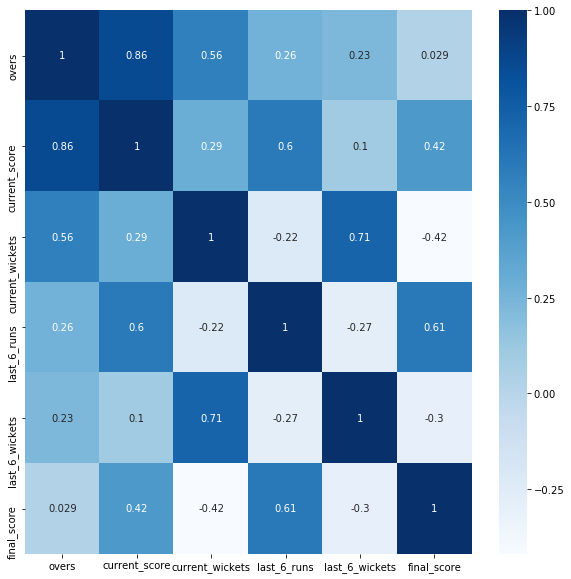

In [26]:
plt.figure(figsize = (10,10))
sns.heatmap(df_processed.corr(), annot=True, cmap = "Blues")

## Encoding the categorical values

In [27]:
small_categories = ["batting_team", "bowling_team", "toss_decision"]
encode = OneHotEncoder(handle_unknown="ignore", sparse=False)

dftemp = pd.DataFrame(encode.fit_transform(df_processed[small_categories]) , index=df_processed.index)

df_processed = pd.concat((dftemp , df_processed.drop(small_categories, axis=1)), axis=1)

In [28]:
df_processed.head(3)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,overs,current_score,current_wickets,last_6_runs,last_6_wickets,final_score
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,6.1,60,1,56.0,1.0,207
39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,6.2,60,1,56.0,1.0,207
40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,6.3,61,1,55.0,1.0,207


## Visualizing the correlation again!

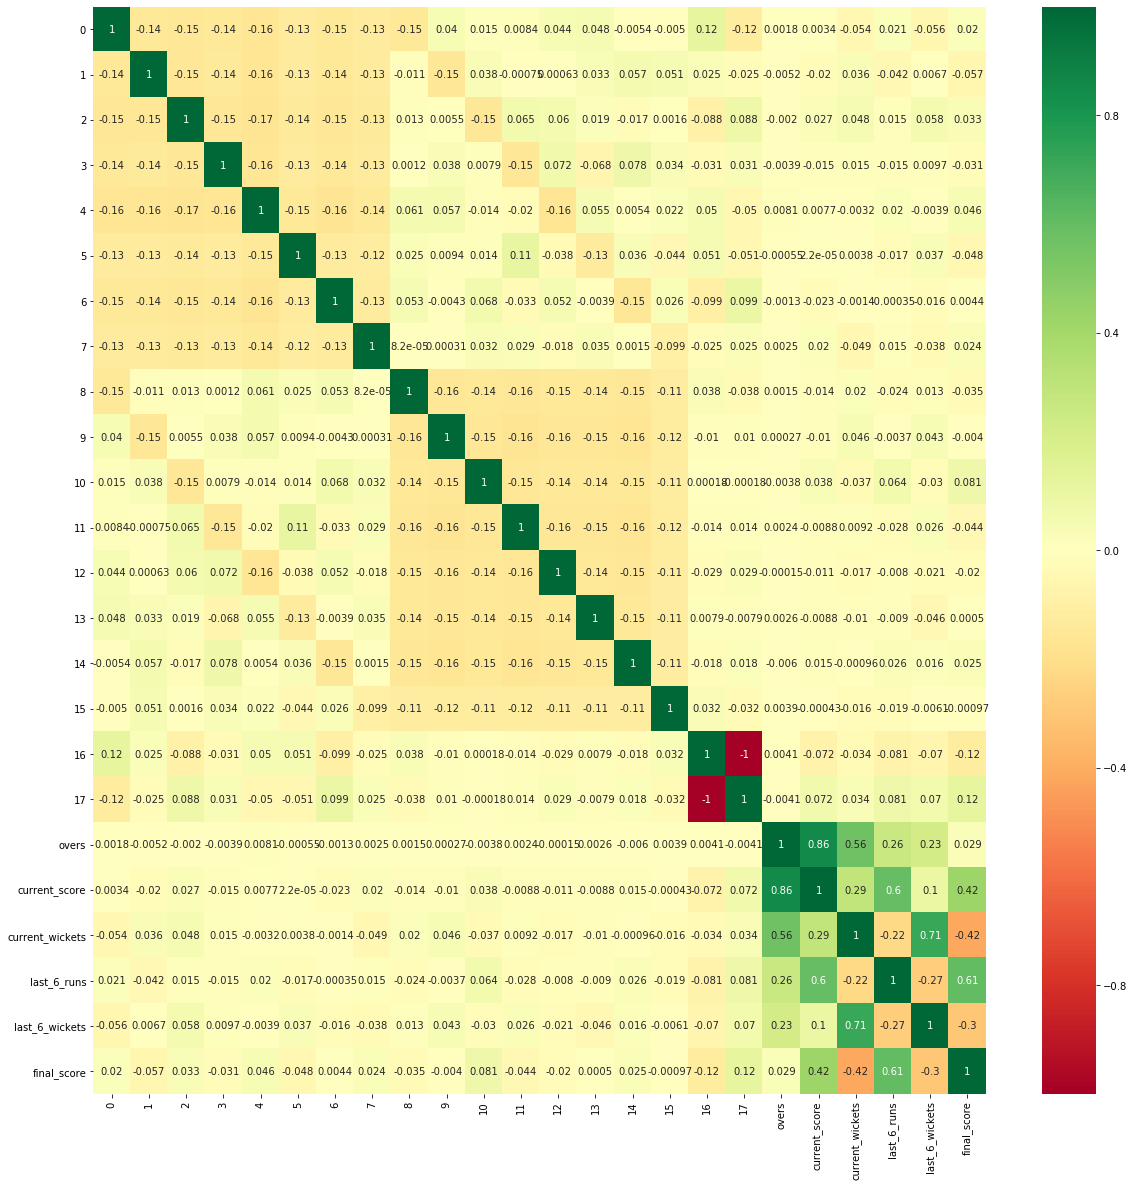

In [29]:
plt.figure(figsize = (20,20))
sns.heatmap(df_processed.corr(), annot=True, cmap = "RdYlGn")

## Splitting into X and y

In [30]:
X = df_processed.iloc[:, :-1]
y = df_processed.iloc[:, -1]

# Feature Engineering

## Scaling

In [31]:
scaler = StandardScaler()
X1 = scaler.fit_transform(X)

## Lasso

In [32]:
selector  = Lasso(alpha=1)
selector.fit(X1, y)
t = selector.coef_
X.columns[t!=0]

Index([4, 5, 16, 17, 'overs', 'current_score', 'current_wickets',
       'last_6_runs'],
      dtype='object')

## Using SelectFromModel With Lasso (Same as previous)

In [33]:
sel = SelectFromModel(selector, prefit=True)
print(sel.transform(X).shape)
sel.transform(X)

(53756, 7)


array([[  0.,   0.,   0., ...,  60.,   1.,  56.],
       [  0.,   0.,   0., ...,  60.,   1.,  56.],
       [  0.,   0.,   0., ...,  61.,   1.,  55.],
       ...,
       [  0.,   0.,   1., ..., 149.,   6.,  45.],
       [  0.,   0.,   1., ..., 155.,   6.,  47.],
       [  0.,   0.,   1., ..., 156.,   7.,  47.]])

## ExtraTreesRegressor

In [34]:
selector1 = ExtraTreesRegressor()
selector1.fit(X1, y)
selector1.feature_importances_

array([0.01555119, 0.01578608, 0.01818479, 0.0154181 , 0.01368847,
       0.01311662, 0.01454978, 0.0118016 , 0.01183891, 0.01348904,
       0.01633179, 0.01305108, 0.01564489, 0.01561601, 0.01739797,
       0.01915937, 0.01346562, 0.01374327, 0.07839092, 0.1984798 ,
       0.15462217, 0.26597695, 0.03469557])

## ExtraTrees with SelectFromModel

In [35]:
sel1 = SelectFromModel(selector1, prefit=True)
print (sel1.transform(X).shape)
print (sel1.get_support())
X.columns[sel1.get_support()]

(53756, 4)
[False False False False False False False False False False False False
 False False False False False False  True  True  True  True False]


Index(['overs', 'current_score', 'current_wickets', 'last_6_runs'], dtype='object')

# Model Selection

## <u>RandomForestRegressor</u>

In [35]:
model0 = RandomForestRegressor()

In [36]:
params = {"n_estimators": [100, 200, 300, 400], "max_depth" : [2,3,4,5,6,7,8]}
regressor0 = GridSearchCV(model0, params, cv=3, verbose=2, scoring="neg_mean_squared_error")
regressor0.fit(X, y)

Fitting 3 folds for each of 28 candidates, totalling 84 fits
[CV] max_depth=2, n_estimators=100 ...................................
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] .................... max_depth=2, n_estimators=100, total=   3.0s
[CV] max_depth=2, n_estimators=100 ...................................
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s
[CV] .................... max_depth=2, n_estimators=100, total=   2.9s
[CV] max_depth=2, n_estimators=100 ...................................
[CV] .................... max_depth=2, n_estimators=100, total=   2.8s
[CV] max_depth=2, n_estimators=200 ...................................
[CV] .................... max_depth=2, n_estimators=200, total=   5.3s
[CV] max_depth=2, n_estimators=200 ...................................
[CV] .................... max_depth=2, n_estimators=200, total=   6.1s
[CV] max_depth=2, n_estimators=200 .................................

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='neg_mean_squared_error', verbose=2)

In [37]:
regressor0.best_params_, regressor0.best_score_

({'max_depth': 8, 'n_estimators': 300}, -426.9878069177017)

## <u>XGBoost</u> 

In [38]:
model = XGBRegressor()

In [39]:
params = {"n_estimators": [200, 300, 400], "learning_rate":[0.05,0.1,0.2,0.35,0.5], "max_depth" : [2,3,4,5]}
regressor = GridSearchCV(model, params, cv=3, verbose=1, scoring="neg_mean_squared_error")
regressor.fit(X, y)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed: 15.8min finished


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [40]:
regressor.best_params_, regressor.best_score_

({'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 400},
 -355.989966091138)

## <u>LGBMRegressor</u>

In [42]:
model1 = LGBMRegressor()

In [43]:
params = {"boosting_type":["gbdt", "dart"], "n_estimators": [200, 300, 400], "learning_rate":[0.05,0.1,0.2,0.35,0.5], "num_leaves" : [31,63]}
regressor1 = GridSearchCV(model1, params, cv=3, verbose=2, scoring="neg_mean_squared_error")
regressor1.fit(X, y)

learning_rate=0.35, n_estimators=300, num_leaves=31, total=   0.6s
[CV] boosting_type=gbdt, learning_rate=0.35, n_estimators=300, num_leaves=63 
[CV]  boosting_type=gbdt, learning_rate=0.35, n_estimators=300, num_leaves=63, total=   0.9s
[CV] boosting_type=gbdt, learning_rate=0.35, n_estimators=300, num_leaves=63 
[CV]  boosting_type=gbdt, learning_rate=0.35, n_estimators=300, num_leaves=63, total=   1.0s
[CV] boosting_type=gbdt, learning_rate=0.35, n_estimators=300, num_leaves=63 
[CV]  boosting_type=gbdt, learning_rate=0.35, n_estimators=300, num_leaves=63, total=   0.9s
[CV] boosting_type=gbdt, learning_rate=0.35, n_estimators=400, num_leaves=31 
[CV]  boosting_type=gbdt, learning_rate=0.35, n_estimators=400, num_leaves=31, total=   0.8s
[CV] boosting_type=gbdt, learning_rate=0.35, n_estimators=400, num_leaves=31 
[CV]  boosting_type=gbdt, learning_rate=0.35, n_estimators=400, num_leaves=31, total=   0.8s
[CV] boosting_type=gbdt, learning_rate=0.35, n_estimators=400, num_leaves=31 


GridSearchCV(cv=3, estimator=LGBMRegressor(),
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'learning_rate': [0.05, 0.1, 0.2, 0.35, 0.5],
                         'n_estimators': [200, 300, 400],
                         'num_leaves': [31, 63]},
             scoring='neg_mean_squared_error', verbose=2)

In [44]:
regressor1.best_params_, regressor1.best_score_

({'boosting_type': 'dart',
  'learning_rate': 0.1,
  'n_estimators': 400,
  'num_leaves': 31},
 -393.4506571346506)

## <u>Lasso Regression</u>

In [64]:
model2 = Lasso()

In [65]:
params = {"alpha":[0.1,0.05,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], "max_iter": [1000, 2000, 4000], "normalize":[True, False]}
regressor2 = GridSearchCV(model2, params, cv=3, verbose=2, scoring="neg_mean_squared_error")
regressor2.fit(X1, y)

.3, max_iter=1000, normalize=False, total=   0.2s
[CV] alpha=0.3, max_iter=1000, normalize=False .......................
[CV] ........ alpha=0.3, max_iter=1000, normalize=False, total=   0.2s
[CV] alpha=0.3, max_iter=1000, normalize=False .......................
[CV] ........ alpha=0.3, max_iter=1000, normalize=False, total=   0.3s
[CV] alpha=0.3, max_iter=2000, normalize=True ........................
[CV] ......... alpha=0.3, max_iter=2000, normalize=True, total=   0.0s
[CV] alpha=0.3, max_iter=2000, normalize=True ........................
[CV] ......... alpha=0.3, max_iter=2000, normalize=True, total=   0.0s
[CV] alpha=0.3, max_iter=2000, normalize=True ........................
[CV] ......... alpha=0.3, max_iter=2000, normalize=True, total=   0.0s
[CV] alpha=0.3, max_iter=2000, normalize=False .......................
[CV] ........ alpha=0.3, max_iter=2000, normalize=False, total=   0.3s
[CV] alpha=0.3, max_iter=2000, normalize=False .......................
[CV] ........ alpha=0.3, ma

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [0.1, 0.05, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1],
                         'max_iter': [1000, 2000, 4000],
                         'normalize': [True, False]},
             scoring='neg_mean_squared_error', verbose=2)

In [66]:
regressor2.best_params_, regressor2.best_score_

({'alpha': 0.1, 'max_iter': 1000, 'normalize': False}, -363.80887913518137)

## <u> Ridge Regression</u>

In [67]:
model3 = Ridge()

In [68]:
params = {"alpha":[0.1,0.05,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,5,10,20,100], "max_iter": [1000, 2000, 4000], "solver" :['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
regressor3 = GridSearchCV(model3, params, cv=3, verbose=1, scoring="neg_mean_squared_error")
regressor3.fit(X1, y)

Fitting 3 folds for each of 315 candidates, totalling 945 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 945 out of 945 | elapsed:  1.1min finished


GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.05, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1, 5, 10, 20, 100],
                         'max_iter': [1000, 2000, 4000],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']},
             scoring='neg_mean_squared_error', verbose=1)

In [69]:
regressor3.best_params_, regressor3.best_score_

({'alpha': 0.1, 'max_iter': 2000, 'solver': 'sag'}, -365.2319473362666)

## <u>Elastic Net Regression</u>

In [70]:
model4 = ElasticNet()

In [71]:
params = {"alpha":[0.1,0.05,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,5,10,20,100], "max_iter": [1000, 2000, 4000]}
regressor4 = GridSearchCV(model4, params, cv=3, verbose=1, scoring="neg_mean_squared_error")
regressor4.fit(X1, y)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   10.3s finished


GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.05, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1, 5, 10, 20, 100],
                         'max_iter': [1000, 2000, 4000]},
             scoring='neg_mean_squared_error', verbose=1)

In [72]:
regressor4.best_params_, regressor4.best_score_

({'alpha': 0.05, 'max_iter': 1000}, -380.371615164175)

## <u>AdaBoost</u>

In [73]:
model5 = AdaBoostRegressor()

In [74]:
params = {"n_estimators": [100, 200, 300], "learning_rate":[0.15,0.35,0.5, 0.75, 1, 5], "loss" : ['linear', 'square']}
regressor5 = GridSearchCV(model5, params, cv=3, verbose=1, scoring="neg_mean_squared_error")
regressor5.fit(X, y)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed: 10.0min finished


GridSearchCV(cv=3, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.15, 0.35, 0.5, 0.75, 1, 5],
                         'loss': ['linear', 'square'],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [75]:
regressor5.best_params_, regressor5.best_score_

({'learning_rate': 0.5, 'loss': 'linear', 'n_estimators': 200},
 -519.2884453431321)

## <u>Linear Regression.</u>

In [76]:
model6 = LinearRegression()

In [77]:
params = {"normalize":[False, True]}
regressor6 = GridSearchCV(model6, params, cv=3, verbose=2, scoring="neg_mean_squared_error")
regressor6.fit(X1, y)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] normalize=False .................................................
[CV] .................................. normalize=False, total=   0.1s
[CV] normalize=False .................................................
[CV] .................................. normalize=False, total=   0.1s
[CV] normalize=False .................................................
[CV] .................................. normalize=False, total=   0.0s
[CV] normalize=True ..................................................
[CV] ................................... normalize=True, total=   0.0s
[CV] normalize=True ..................................................
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[CV] ................................... normalize=True, total=   0.0s
[CV] normalize=True ..................................................

GridSearchCV(cv=3, estimator=LinearRegression(),
             param_grid={'normalize': [False, True]},
             scoring='neg_mean_squared_error', verbose=2)

In [78]:
regressor6.best_params_, regressor6.best_score_

({'normalize': False}, -365.6111322328934)

In [79]:
regressor6.fit(X, y)
regressor6.best_params_, regressor6.best_score_

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] normalize=False .................................................
[CV] .................................. normalize=False, total=   0.0s
[CV] normalize=False .................................................
[CV] .................................. normalize=False, total=   0.0s
[CV] normalize=False .................................................
[CV] .................................. normalize=False, total=   0.0s
[CV] normalize=True ..................................................
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[CV] ................................... normalize=True, total=   0.0s
[CV] normalize=True ..................................................
[CV] ................................... normalize=True, total=   0.0s
[CV] normalize=True ..................................................

({'normalize': True}, -365.56980691972086)

# So, we chose XGBoost Regressor with lr=0.1, depth = 2 and 400 estimators.